## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 5**. Going through these materials before attempting this assignment is highly recommended.

You are going to work with the **EMNIST** dataset for *image recognition task*. This dataset can be installed with the command <kbd>pip install emnist</kbd>. It has the exact same format as MNIST (grayscale images of 28 × 28 pixels), but the images represent handwritten letters rather than handwritten digits, so the problem is more challenging than MNIST.

### <span style="color:#0b486b">Question 2.1: Load the EMNIST datasets and process data</span> 


<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

We first use functions in the package **emnist**, namely <kbd>extract_training_samples</kbd> and <kbd>extract_test_samples</kbd>, to load the training and testing sets. We also want to encode labels using an ordinal encoding scheme.

In [1]:
import numpy as np
from emnist import extract_training_samples, extract_test_samples
from sklearn.preprocessing import LabelEncoder

In [2]:
X_train_raw, y_train_raw = extract_training_samples("letters")
X_test_raw, y_test_raw = extract_test_samples("letters")
print(X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape)

(124800, 28, 28) (124800,) (20800, 28, 28) (20800,)


In [3]:
print(y_train_raw)
print(y_test_raw)

[23  7 16 ... 13 15 19]
[ 1  1  1 ... 26 26 26]


In [4]:
le = LabelEncoder()
le.fit(y_train_raw)
le.fit(y_test_raw)

y_train_full = le.transform(y_train_raw)
y_test = le.transform(y_test_raw)

class_ids = np.unique(y_train_full)
n_classes = len(class_ids)
print(class_ids)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


The shape of training and testing data are $(num\_train, 28, 28)$ and $(num\_test, 28, 28)$, where $num\_train$ and $num\_test$ are number of training and testing images respectively. We next convert them to arrays of vectors which have shape $(num\_train, 784)$ and $(num\_test, 784)$.

In [5]:
num_train = X_train_raw.shape[0]
num_test = X_test_raw.shape[0]
X_train_full = X_train_raw.reshape(num_train, -1)
X_test = X_test_raw.reshape(num_test, -1)
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(124800, 784) (124800,)
(20800, 784) (20800,)


### <span style="color:#0b486b">Question 2.2: Split data into training, validation, and testing datasets</span>

<div style="text-align: right"> <span style="color:red">[2 points]</span> </div>

You need to write the code to address the following requirements:
- Use $10 \%$ of `X_train_full`, `y_train_full` for validation and the rest of `X_train_full`, `y_train_full` for training. This splits `X_train_full` and `y_train_full` into `X_train`, `y_train` ($90 \%$) and `X_val`, `y_val` ($10 \%$).
- Finally, scale the pixels of `X_train`, `X_val`, and `X_test` to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=2
)
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

print(
    X_train.min(), X_train.max(), X_val.min(), X_val.max(), X_test.min(), X_test.max()
)

(112320, 784) (112320,)
(12480, 784) (12480,)
(20800, 784) (20800,)
0.0 1.0 0.0 1.0 0.0 1.0


### <span style="color:#0b486b">Question 2.3: Visualize some images in the training set with labels</span>

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You are required to write the code to **randomly** show $36$ images in X_train_full_img (which is an array of images) with labels as in the following figure.

<img src="Figures/emnist_grid.png" width="450" align="center"/>

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
""" A Random Number Generator class.
It has 1 attribute which acts as the generator of values. 
The values are generated using the input seed provided in the constructor of the class. 
If no seed is provided, the default seed of 0 will be used instead. 
"""
class RNG:
    def __init__(self, seed=0):
        self.rng = np.random.default_rng(seed)

    def next_int(self):
        return int(self.rng.random() * 5 // 1 - 2)

    def next(self):
        return self.rng.random()

C:\Users\User\AppData\Local\Temp\ipykernel_8964\627148093.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


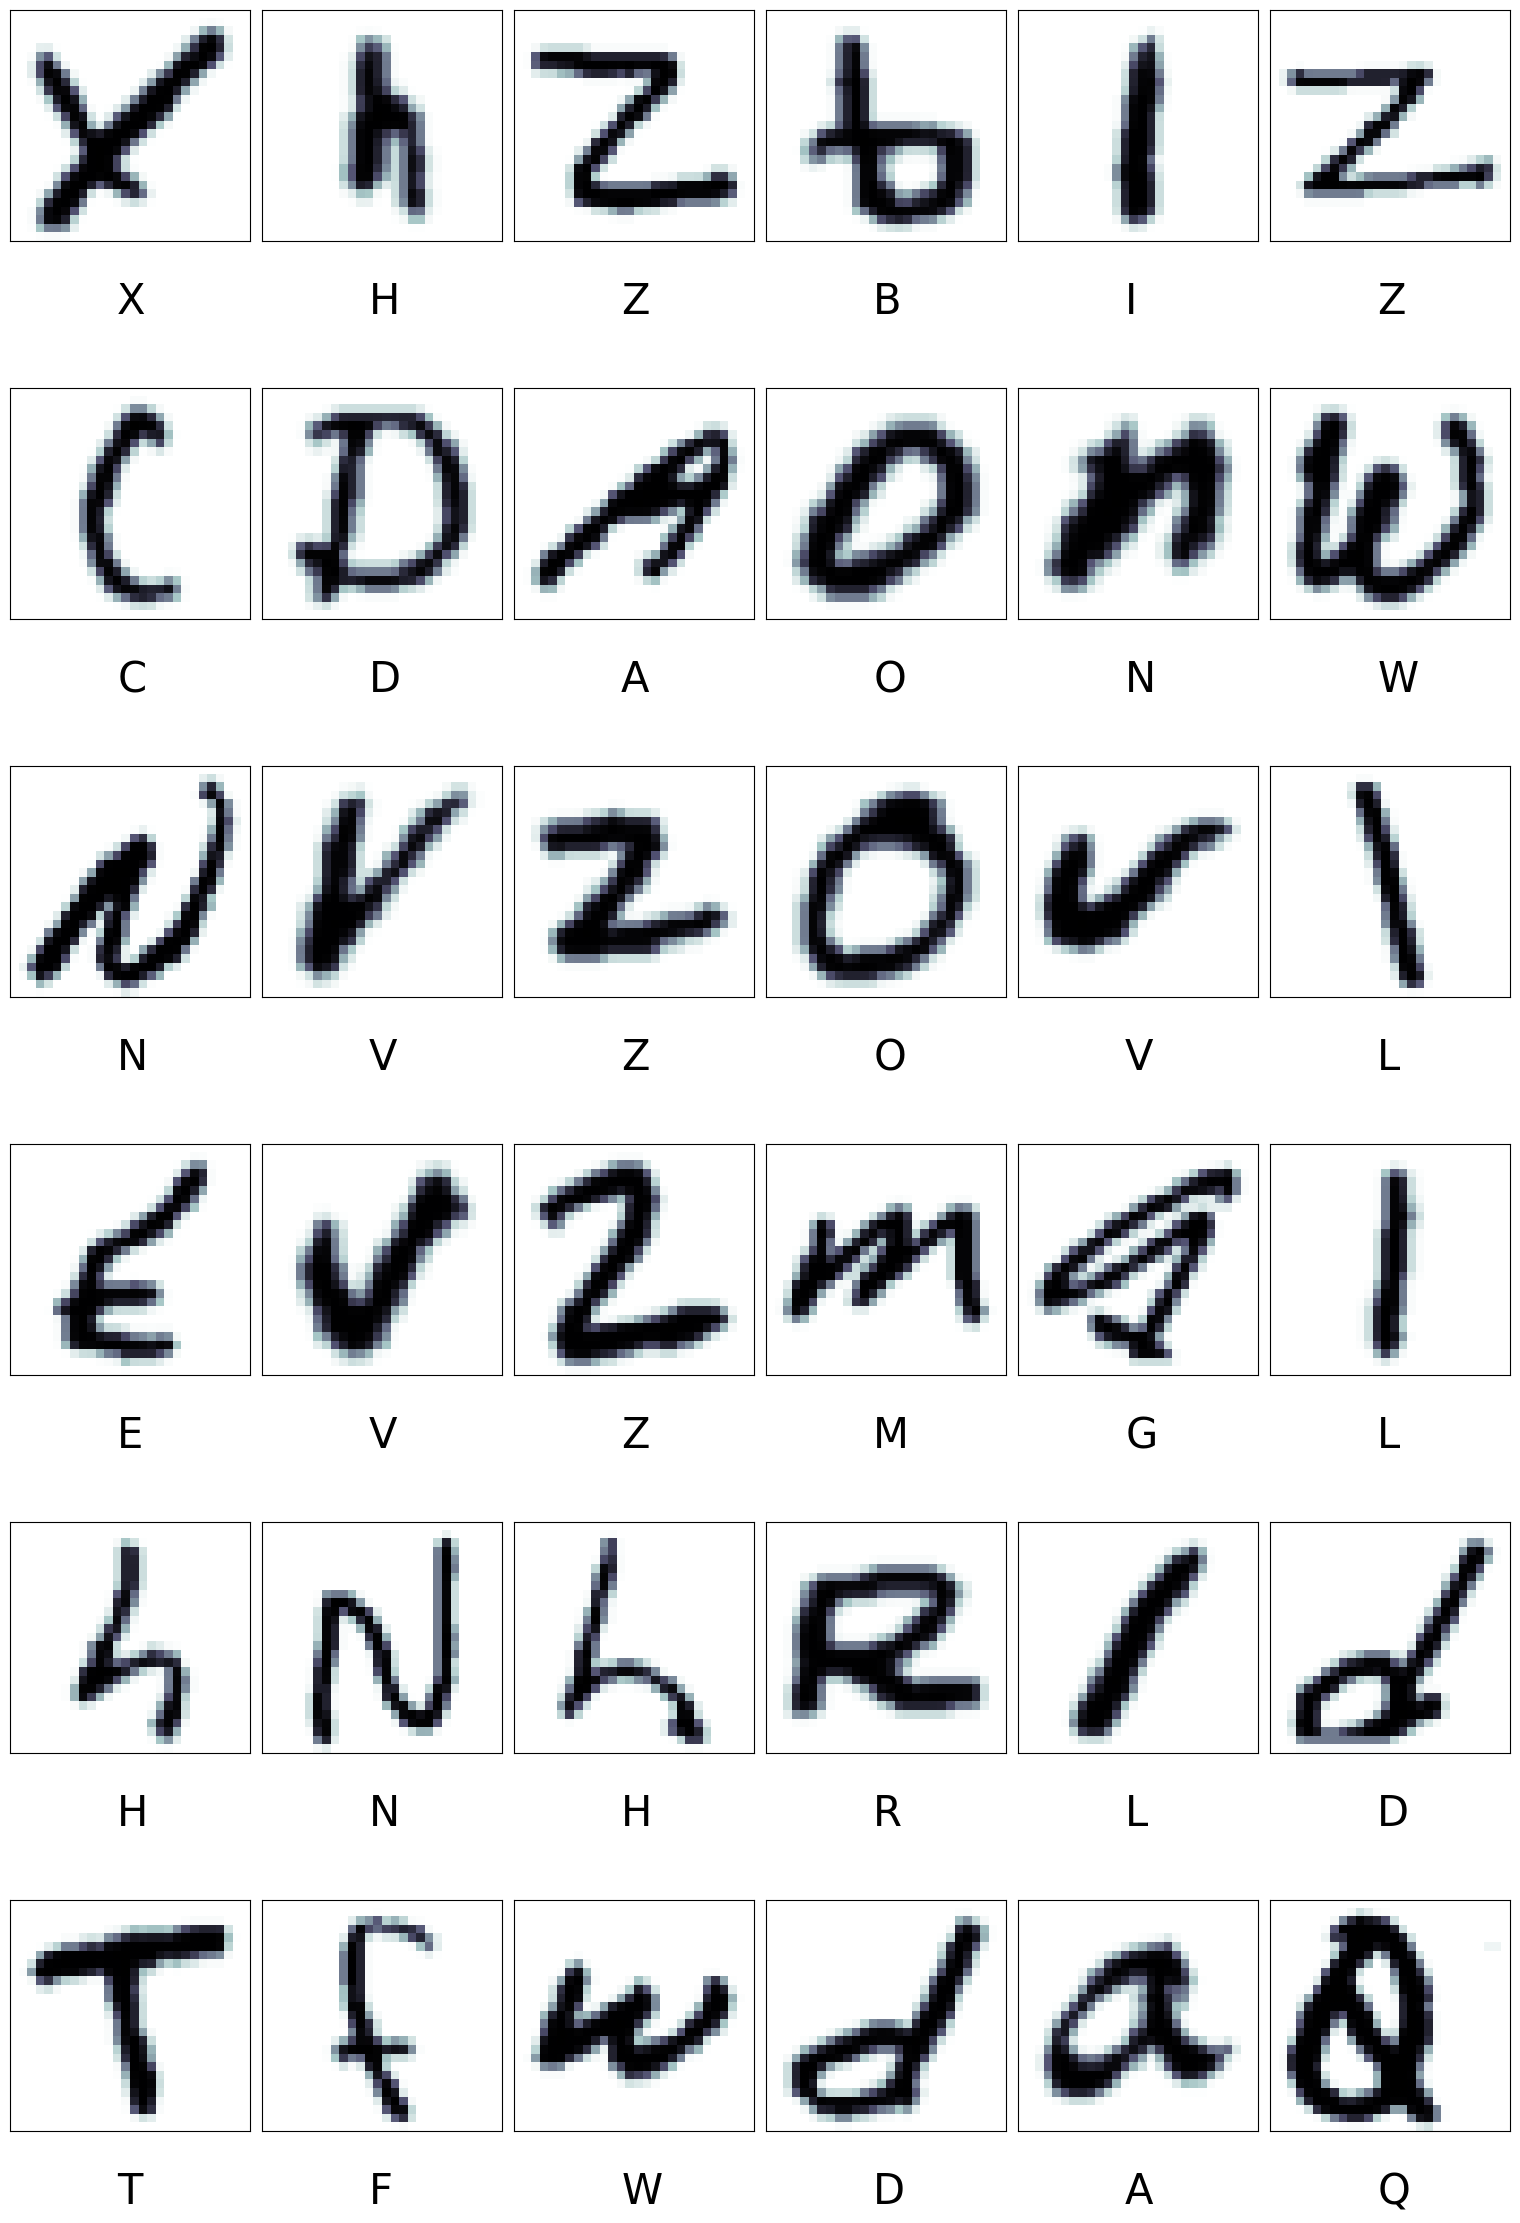

In [9]:
CHARAC_OFFSET = ord("A")
FIG_DIM_SIZE = 15
IMG_PIXELS_DIM = 28
INIT_IMG_SIZE = IMG_PIXELS_DIM * IMG_PIXELS_DIM
SEED = 32809824
NUM_IMGS = len(X_train)

RNG_Image = RNG(SEED)

negate = lambda pixel: 1 - pixel

def display_rand_letters(images, label, num2display):
    fig = plt.figure(figsize=(FIG_DIM_SIZE, FIG_DIM_SIZE))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1.5, hspace=0.05, wspace=0.05)

    created_images = [-1]

    for i in range(num2display):
        new_img_index = -1
        while new_img_index in created_images:
            new_img_index = int(RNG_Image.next() * NUM_IMGS)

        p = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
        img_path = images[new_img_index]

        p.imshow(np.array(
            [
                [negate(img_path[x]) for x in range(y - IMG_PIXELS_DIM, y)]
                for y in range(IMG_PIXELS_DIM, INIT_IMG_SIZE, IMG_PIXELS_DIM)
            ]
        ), cmap=plt.cm.bone)

        # show label in the left corner of an image
        p.text(12, 35, str(chr(label[new_img_index] + CHARAC_OFFSET)), color="black", fontsize=30)

    fig.show()

display_rand_letters(X_train, y_train, 36)

### <span style="color:#0b486b">Question 2.4: Write code for the feed-forward neural net using TF 2.x</span>

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 40(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

random_seed = 32809824
tf.random.set_seed(random_seed)

In [11]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
dnn_model = Sequential()
dnn_model.add(Dense(units=20,  input_shape=(784,), activation='relu'))
dnn_model.add(Dense(units=40, activation='relu'))
dnn_model.add(Dense(units=n_classes, activation='softmax'))

dnn_model.build()
dnn_model.summary()

dnn_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

logdir = "tf_logs/A1_Part2"

# Init a tensorboard_callback 
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Call the fit method, passing the tensorboard_callback 
history = dnn_model.fit(x=X_train, y=y_train, batch_size=32, 
                        epochs=20, 
                        validation_data=(X_val, y_val), 
                       callbacks=[tensorboard_callback])

dnn_model.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1066      
Total params: 17,606
Trainable params: 17,606
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
3510/3510 [==============================] - 9s 3ms/step - loss: 1.1211 - accuracy: 0.6717 - val_loss: 0.8708 - val_accuracy: 0.7469
Epoch 2/20
3510/3510 [==============================] - 8s 2ms/step - loss: 0.7659 - accuracy: 0.7745 - val_loss: 0.7215 - val_accuracy: 0.7916
Epoch 3/20
3510/3510 [==============================] - 8s 2ms/step - loss: 0.6611 - accuracy:

[0.5188665390014648, 0.8443750143051147]

### <span style="color:#0b486b">Question 2.5: Tuning hyper-parameters with grid search</span>
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [17]:
class ModelResults:
    def __init__(self):
        return

    def add_accuracy(self, accuracy):
        self.accuracy = accuracy

class TuningResults(ModelResults):
    def __init__(self, act, n1, n2):
        self.act = act
        self.n1 = n1
        self.n2 = n2 

activation_funcs = ["sigmoid", "tanh", "relu"]
n1_vals, n2_vals = [20, 40], [20, 40]
n1_n2_vals = [(x, y) for x in n1_vals for y in n2_vals]

results = []

for act in activation_funcs:
    for n1, n2 in n1_n2_vals:
        result = TuningResults(act, n1, n2)

        dnn_model = Sequential()
        dnn_model.add(Dense(units=n1, input_shape=(784,), activation=act))
        dnn_model.add(Dense(units=n2, activation=act))
        dnn_model.add(Dense(units=n_classes, activation="softmax"))

        dnn_model.build()
        # dnn_model.summary()

        dnn_model.compile(
            optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"],
        )

        logdir = "tf_logs/A1_Part2_tuning"

        # Init a tensorboard_callback
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

        # Call the fit method, passing the tensorboard_callback
        history = dnn_model.fit(
            x=X_train,
            y=y_train,
            batch_size=32,
            epochs=20,
            validation_data=(X_val, y_val),
            callbacks=[tensorboard_callback],
        )

        result.add_accuracy(dnn_model.evaluate(X_test, y_test)[1])
        results.append(result)

for result in results:
    print(f'Activation function: {result.act} | n1: {result.n1} | n2: {result.n2} | accuracy: {result.accuracy}')

Epoch 1/20
3510/3510 [==============================] - 10s 3ms/step - loss: 2.0571 - accuracy: 0.4601 - val_loss: 1.4067 - val_accuracy: 0.6010
Epoch 2/20
3510/3510 [==============================] - 9s 3ms/step - loss: 1.2481 - accuracy: 0.6333 - val_loss: 1.1501 - val_accuracy: 0.6582
Epoch 3/20
3510/3510 [==============================] - 11s 3ms/step - loss: 1.0655 - accuracy: 0.6882 - val_loss: 1.0355 - val_accuracy: 0.6921
Epoch 4/20
3510/3510 [==============================] - 11s 3ms/step - loss: 0.9721 - accuracy: 0.7125 - val_loss: 0.9676 - val_accuracy: 0.7161
Epoch 5/20
3510/3510 [==============================] - 10s 3ms/step - loss: 0.9120 - accuracy: 0.7293 - val_loss: 0.9214 - val_accuracy: 0.7289
Epoch 6/20
3510/3510 [==============================] - 7s 2ms/step - loss: 0.8696 - accuracy: 0.7418 - val_loss: 0.8883 - val_accuracy: 0.7393
Epoch 7/20
3510/3510 [==============================] - 6s 2ms/step - loss: 0.8383 - accuracy: 0.7506 - val_loss: 0.8706 - val_accur

### <span style="color:#0b486b">Question 2.6: Experimenting with the **label smoothing** technique</span>
<div style="text-align: right"> <span style="color:red">[8 points]</span> </div>

Implement the label smoothing technique (i.e., [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) by yourself. Note that you cannot use the built-in label-smoothing loss function in TF2.x. Try the label smoothing technique with $\alpha =0.1, 0.15, 0.2$ and report the performances. You need to examine the label smoothing technique with the best architecture obtained in **Question 2.5**.

In [39]:
from tensorflow.keras.utils import to_categorical

class SmoothingResult(ModelResults):
    def __init__(self, alpha):
        self.alpha = alpha

def label_smoothing(val, alpha, k = 26):
    return val * (1 - alpha) + (alpha / k)

alpha_vals = [0.1, 0.15, 0.2]
new_y_train = to_categorical(y_train)

smoothing_results = []

for alpha in alpha_vals:
    result = SmoothingResult(alpha)

    smoothen_y_train = label_smoothing(new_y_train, alpha)
    
    dnn_model = Sequential()
    dnn_model.add(Dense(units=40, input_shape=(784,), activation='relu'))
    dnn_model.add(Dense(units=40, activation='relu'))
    dnn_model.add(Dense(units=n_classes, activation="softmax"))

    dnn_model.build()

    dnn_model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    logdir = "tf_logs/A1_Part2_label_smoothing"

    # Init a tensorboard_callback
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Call the fit method, passing the tensorboard_callback
    history = dnn_model.fit(
        x=X_train,
        y=smoothen_y_train,
        batch_size=32,
        epochs=20,
        validation_data=(X_val, to_categorical(y_val)),
        callbacks=[tensorboard_callback],
    )

    result.add_accuracy(dnn_model.evaluate(X_test, to_categorical(y_test))[1])

    smoothing_results.append(result)

for result in smoothing_results:
    print(f'alpha: {result.alpha} | accuracy: {result.accuracy}')


Epoch 1/20
3510/3510 [==============================] - 3s 743us/step - loss: 1.4777 - accuracy: 0.7229 - val_loss: 0.7738 - val_accuracy: 0.8022
Epoch 2/20
3510/3510 [==============================] - 2s 681us/step - loss: 1.2095 - accuracy: 0.8200 - val_loss: 0.6777 - val_accuracy: 0.8304
Epoch 3/20
3510/3510 [==============================] - 2s 689us/step - loss: 1.1437 - accuracy: 0.8420 - val_loss: 0.6217 - val_accuracy: 0.8425
Epoch 4/20
3510/3510 [==============================] - 3s 789us/step - loss: 1.1064 - accuracy: 0.8553 - val_loss: 0.5862 - val_accuracy: 0.8546
Epoch 5/20
3510/3510 [==============================] - 3s 772us/step - loss: 1.0820 - accuracy: 0.8617 - val_loss: 0.5673 - val_accuracy: 0.8592
Epoch 6/20
3510/3510 [==============================] - 3s 726us/step - loss: 1.0650 - accuracy: 0.8669 - val_loss: 0.5561 - val_accuracy: 0.8619
Epoch 7/20
3510/3510 [==============================] - 3s 725us/step - loss: 1.0539 - accuracy: 0.8712 - val_loss: 0.5588 -